### Introductory Machine Learning Pre-Class assignment 2 Predicting House Prices


#### [Problem 1] Selection of features for practice

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv('/home/jules/projects/dic/mldocs/train.csv', index_col='Id')
df.head()


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [68]:
df1 = df.loc[:,['GrLivArea','YearBuilt','SalePrice']]
df1

GrLivArea  YearBuilt  SalePrice
Id                                   
1          1710       2003     208500
2          1262       1976     181500
3          1786       2001     223500
4          1717       1915     140000
5          2198       2000     250000
...         ...        ...        ...
1456       1647       1999     175000
1457       2073       1978     210000
1458       2340       1941     266500
1459       1078       1950     142125
1460       1256       1965     147500

[1460 rows x 3 columns]

In [69]:
df1.describe()

GrLivArea    YearBuilt      SalePrice
count  1460.000000  1460.000000    1460.000000
mean   1515.463699  1971.267808  180921.195890
std     525.480383    30.202904   79442.502883
min     334.000000  1872.000000   34900.000000
25%    1129.500000  1954.000000  129975.000000
50%    1464.000000  1973.000000  163000.000000
75%    1776.750000  2000.000000  214000.000000
max    5642.000000  2010.000000  755000.000000

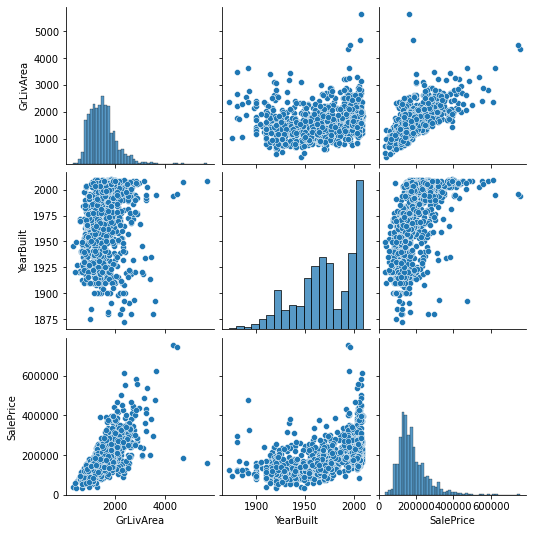

In [70]:
sns.pairplot(df1)
plt.show()

In [71]:
x = df1.loc[:,['GrLivArea', 'YearBuilt']]
y = df1.loc[:,'SalePrice']
x.head()


GrLivArea  YearBuilt
Id                      
1        1710       2003
2        1262       1976
3        1786       2001
4        1717       1915
5        2198       2000

In [72]:
x.shape, y.shape

((1460, 2), (1460,))

#### [Problem 2] Estimate and evaluation by linear regression

In [73]:
# Division of preprocessing/training data and verification data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1095, 2), (365, 2), (1095,), (365,))

In [74]:
# Preteatment/standardization

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Learning and simulation

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_preds = reg.predict(x_test)

# Estimation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
print("MSE Linear Regression: {:,.3f}".format(mse))

MSE Linear Regression: 2,301,155,022.431


In [75]:
from sklearn.metrics import r2_score
print(f'R2 (coefficient of determination) Linear Regression: {r2_score(y_test, y_preds)}')

R2 (coefficient of determination) Linear Regression: 0.5271275438803575


In [76]:
reg.score(x_test, y_test)

0.5271275438803575

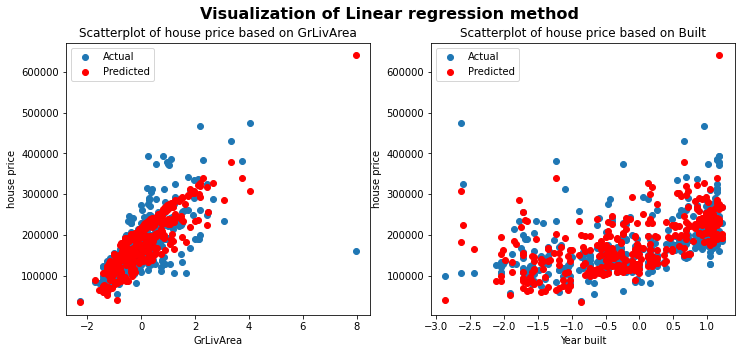

In [77]:
def visualization(ypeds, title):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax1.scatter(x_test[:,0], y_test)
    ax1.scatter(x_test[:,0], ypeds, c='red')
    classes =['Actual', 'Predicted']
    ax1.legend(labels=classes)
    ax1.set(title= "Scatterplot of house price based on GrLivArea", xlabel="GrLivArea", ylabel="house price")

    ax2.scatter(x_test[:,1], y_test)
    ax2.scatter(x_test[:,1], ypeds, c='red')
    ax2.legend(labels=classes)
    ax2.set(title= "Scatterplot of house price based on Built", xlabel="Year built", ylabel="house price")
    fig.suptitle(title, fontsize=16, fontweight='bold');
visualization(y_preds, "Visualization of Linear regression method")

#### [Problem 3] Comparison of methods

In [78]:
# SVM 
from sklearn.svm import SVR
svr_reg= SVR()
svr_reg.fit(x_train, y_train)
y_preds_svr = svr_reg.predict(x_test)
mse_svr = mean_squared_error(y_test, y_preds_svr)
print("MSE SVR: {:,.3f}".format(mse_svr))
print(f'R2 score SVM: {r2_score(y_test, y_preds_svr)}')

MSE SVR: 4,994,551,226.360
R2 score SVM: -0.026347935103095965


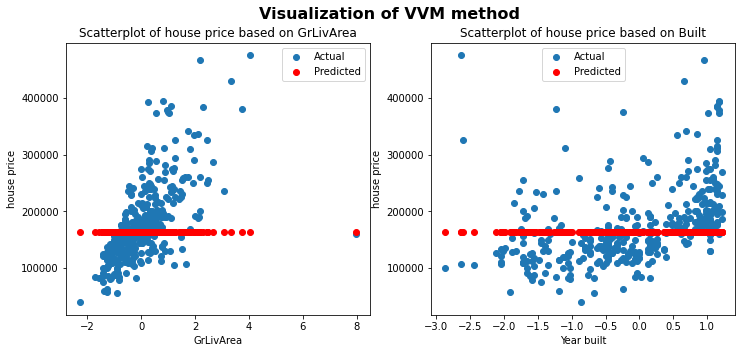

In [79]:
visualization(y_preds_svr, "Visualization of VVM method")

MSE Random Forest: 1,714,509,364.301
R^2 Random Forest: 0.647679427837633


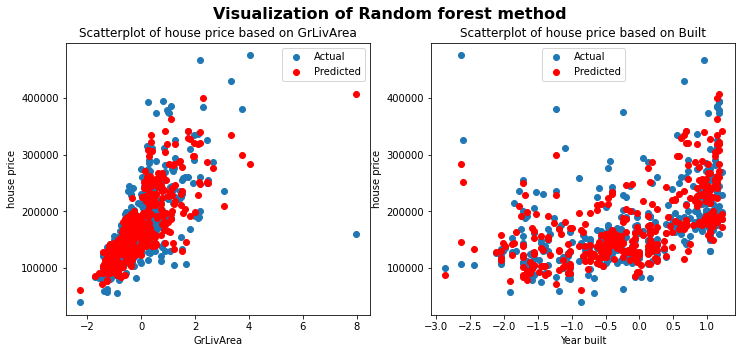

In [80]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_preds_rf = rf_reg.predict(x_test)

mse_rf = mean_squared_error(y_test, y_preds_rf)
print("MSE Random Forest: {:,.3f}".format(mse_rf))

print(f'R^2 Random Forest: {r2_score(y_test,y_preds_rf)}')


visualization(y_preds_rf,"Visualization of Random forest method")

MSE Decision Tree: 2,341,808,496.22
R^2 Score Decision Tree: 0.5187735182657225


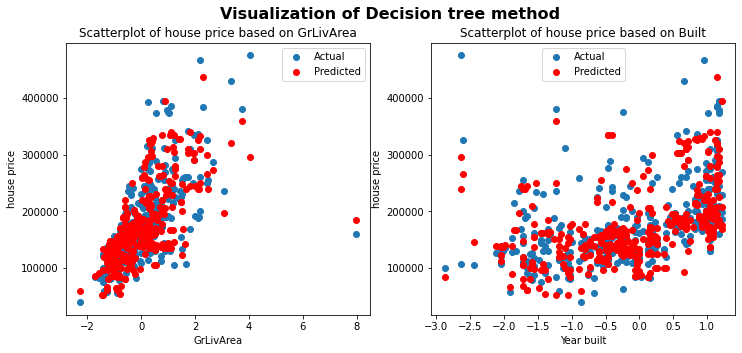

In [81]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
y_preds_dt = dt_reg.predict(x_test)

mse_dt = mean_squared_error(y_test, y_preds_dt)
print("MSE Decision Tree: {:,.2f}".format(mse_dt))

print(f'R^2 Score Decision Tree: {r2_score(y_test, y_preds_dt)}')

visualization(y_preds_dt, "Visualization of Decision tree method")



|  Model | Linear Regression  | SVM  |  Decision Tree | Random Forest  |
|---  |---  |---  |---  |---  |
|  mean_squared_error |1,890,621,258.199   | 6,171,329,492.379  | 2,686,172,282.42  |  1,543,387,913.281 |
| r2_score  | 0.68  | -0.039  |  0.54 | 0.74  |


#### [Problem 4] (Advance task) Learning using other features

In [82]:
# Top hight correlation on SalePrice
df.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(10)

SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897

In [83]:
# increase target
df2 = df.loc[:,['GrLivArea','OverallQual','YearBuilt','GarageCars','GarageArea', 'SalePrice']]
df2.head()

GrLivArea  OverallQual  YearBuilt  GarageCars  GarageArea  SalePrice
Id                                                                      
1        1710            7       2003           2         548     208500
2        1262            6       1976           2         460     181500
3        1786            7       2001           2         608     223500
4        1717            7       1915           3         642     140000
5        2198            8       2000           3         836     250000

In [84]:
x2 = df2.loc[:,['GrLivArea','OverallQual','YearBuilt','GarageCars','GarageArea']]
y2 = df2.loc[:,'SalePrice']

x2_train,x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

scaler = StandardScaler()
scaler.fit(x2_train)
x2_train = scaler.transform(x2_train)
x2_test =scaler.transform(x2_test)
# method_list = ['LinearRegression','SVM',"DecisionTree",'RandomForest']
def Regression_Models(x_train,x_test, y_train, y_test, features_list):
    # prediction by 4 methods
    method_list = ['LinearRegression','SVM',"DecisionTree",'RandomForest']
    lr = LinearRegression().fit(x_train, y_train).predict(x_test)
    svr = SVR().fit(x_train,y_train).predict(x_test)
    dt = DecisionTreeRegressor().fit(x_train,y_train).predict(x_test)
    rf = RandomForestRegressor().fit(x_train,y_train).predict(x_test)
    y_pred_list = [lr,svr,dt,rf]
    # calculate mse and summarize it in a table
    mse_list =[mean_squared_error(y_test,lr),mean_squared_error(y_test, svr),mean_squared_error(y_test,dt),mean_squared_error(y_test,rf)]
    df_mse.loc['MSE with 5 features'] =mse_list
    display(df_mse)
    # display scatter plot y-axis being for the target variable and x-axis for features
    for method, y_pred in zip(method_list, y_pred_list):
        fig,axes = plt.subplots(1, len(features_list), figsize=(6*len(features_list),5),sharey=True)
        fig.suptitle(method,fontweight="bold",size=20)
        for i in range(len(features_list)):
            axes[i].scatter(x_test[:,i],y_test, color='blue', label='test data')
            axes[i].scatter(x_test[:,i],y_pred, color='purple', label='pred data')
            axes[i].set_title(features_list[i])
            axes[i].set_ylabel('SalePrice')
            axes[i].legend()
        plt.show()



LinearRegression           SVM  DecisionTree  \
mean_squared_error                                                  
MSE with 5 features      1.120191e+09  5.913795e+09  1.679196e+09   

                     RandomForest  
mean_squared_error                 
MSE with 5 features  9.382097e+08

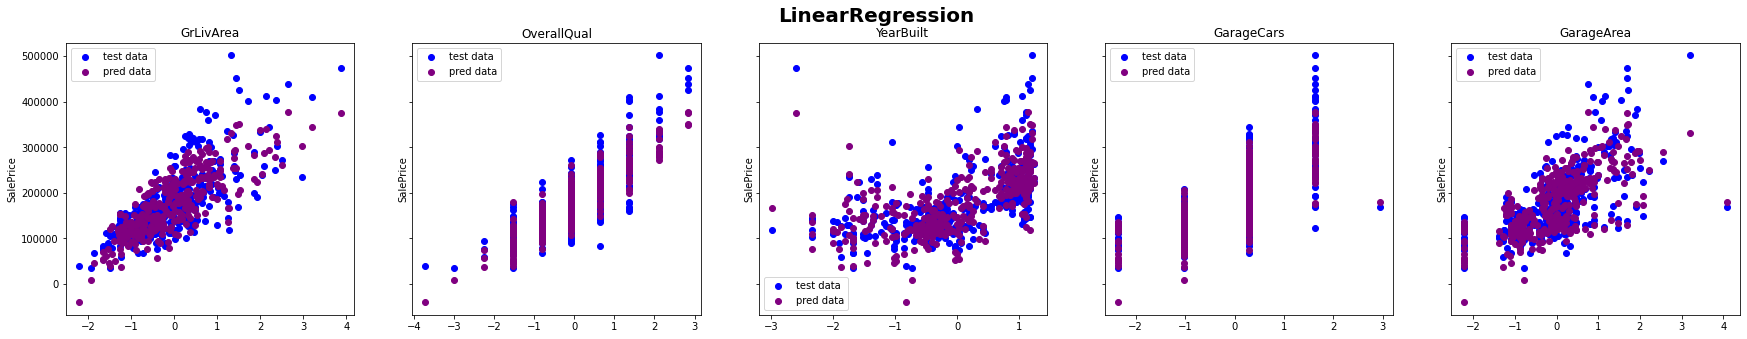

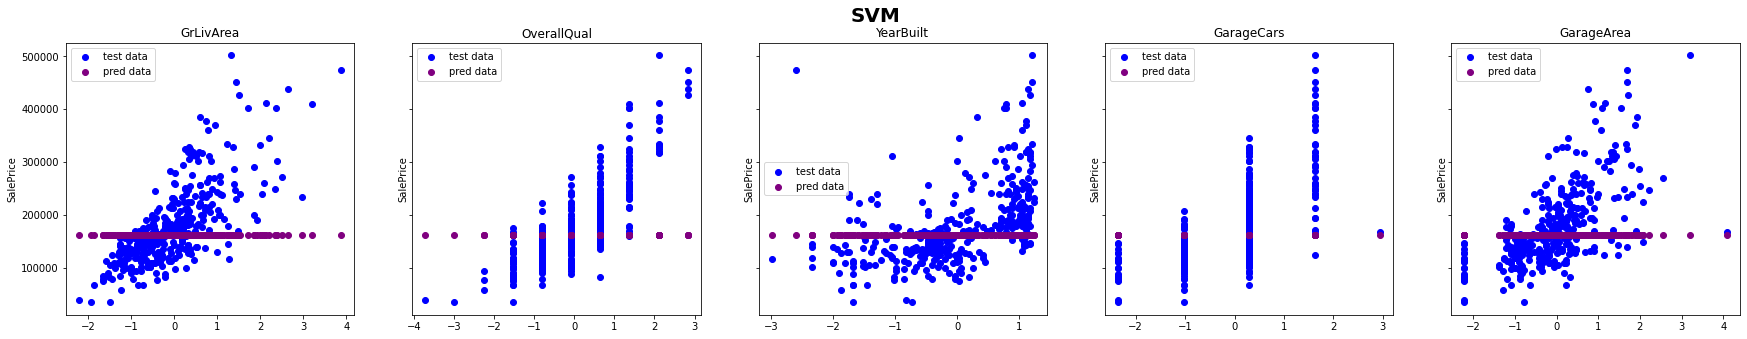

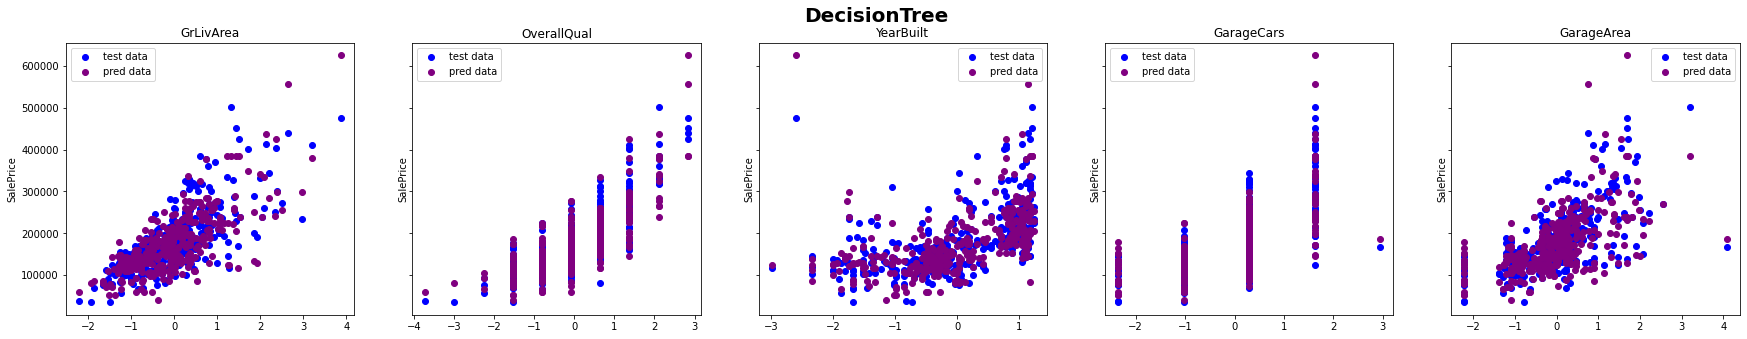

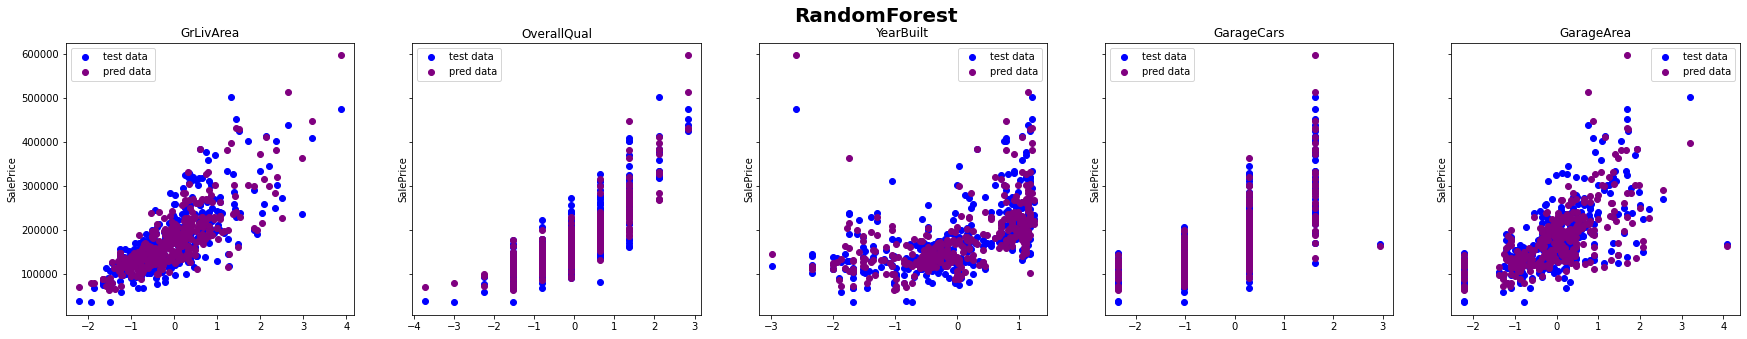

In [85]:
df_mse =pd.DataFrame(columns=method_list+['mean_squared_error']).set_index('mean_squared_error')
features_list = ['GrLivArea','OverallQual' , 'YearBuilt', 'GarageCars','GarageArea']
Regression_Models(x2_train,x2_test, y2_train,y2_test,features_list)